In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ranks.csv')

pivot = df.pivot(index='Name', columns='Category', values='Rank')

variance = pd.DataFrame({
    'Feature': pivot.index,
    'Variance': pivot.var(axis=1),
    'Mean Rank': pivot.mean(axis=1)
})


variance = variance.sort_values('Variance', ascending=False)
print(variance)

variance.to_csv('ranking_variance.csv', index=False)

                                                               Feature  \
Name                                                                     
Number_of_paralogs                                  Number_of_paralogs   
gnomAD_exomes_AF                                      gnomAD_exomes_AF   
1000Gp3_AF                                                  1000Gp3_AF   
Rare10000bp                                                Rare10000bp   
BIOTYPE_protein_coding                          BIOTYPE_protein_coding   
...                                                                ...   
N-GLYCOSYLATION                                        N-GLYCOSYLATION   
ACETYLATION                                                ACETYLATION   
MYRISTOYLATION                                          MYRISTOYLATION   
ASAquick_rawscore_aa_window_8_prev  ASAquick_rawscore_aa_window_8_prev   
RemapOverlapCL                                          RemapOverlapCL   

                                    V

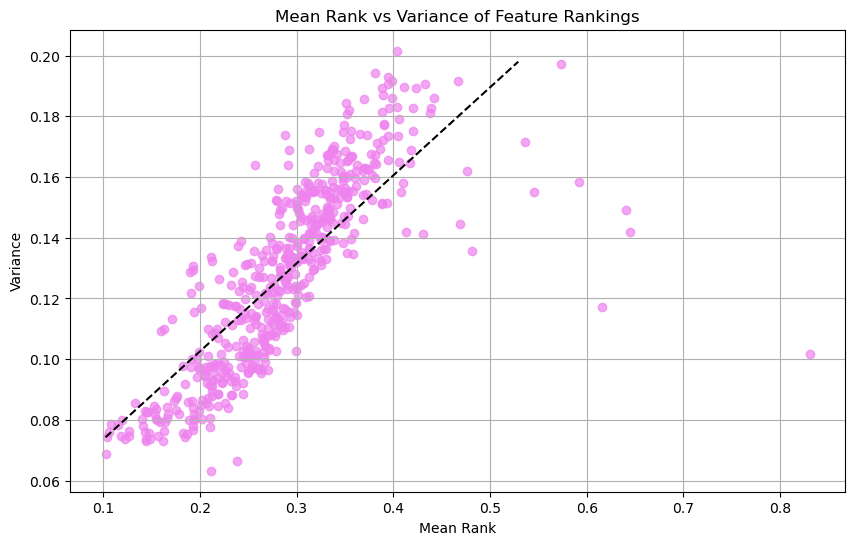

In [3]:
# Load CSV.
df = pd.read_csv('ranking_variance.csv')

# Scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(df['Mean Rank'], df['Variance'], color='violet', alpha=0.7)

# Line of best fit.
m, b = np.polyfit(df['Mean Rank'], df['Variance'], 1)
x_range = np.linspace(df['Mean Rank'].min(), df['Mean Rank'].max(), 100)
y_values = m * x_range + b

x_range_filtered = x_range[y_values <= 0.20]
y_values_filtered = y_values[y_values <= 0.20]

plt.plot(x_range_filtered, y_values_filtered, color='black', linestyle='--')
plt.title('Mean Rank vs Variance of Feature Rankings')
plt.xlabel('Mean Rank')
plt.ylabel('Variance')
plt.grid(True)
plt.show()